# Analisis Penjualan Global untuk Strategi Keuntungan yang Lebih Baik

## 1. Project Overview
**Latar Belakang:**

Di dunia bisnis yang terus berubah, setiap perusahaan pasti ingin tahu apa saja yang membuat penjualan mereka naik atau turun di berbagai wilayah dan jenis produk. Dengan melihat data dari Global Sales Performance Dataset, kita bisa tahu hal-hal penting seperti tren penjualan, seberapa efektif promo atau diskon yang dilakukan, dan di mana saja ada peluang untuk meningkatkan keuntungan. Jadi, analisis data ini bisa membantu perusahaan membuat keputusan yang lebih tepat dan mengembangkan strategi penjualan yang lebih baik.

**Tujuan Proyek:**

Proyek ini dibuat untuk ngulik isi dataset ini supaya bisa:
*   Cari tahu region dan kategori produk mana yang punya Revenue dan Profit paling tinggi dan paling rendah.
*   Lihat seberapa besar pengaruh Discount_Percentage (diskon) terhadap Profit, apakah bantu naik atau malah nurunin untung.
*   Coba lihat hubungan antara Marketing_Spend sama hasil Revenue dan Profit.
*   Dari hasil analisisnya, kasih saran strategi yang bisa langsung dipraktikkan biar perusahaan bisa makin untung.

**Rumusan Masalah:**
*   Region mana yang paling konsisten kasih Profit Margin tinggi, bukan cuma Revenue besar?
*   Apakah ngasih Discount_Percentage tinggi itu benar-benar efektif, atau malah bikin Profit jadi turun?
*   Dari semua Product_Category, mana yang jadi “mesin profit” (untung besar) dan mana yang cuma “penjual volume” (pendapatan/revenue tinggi, tapi untung/profit tipis)?
*   Seberapa besar pengaruh Marketing_Spend terhadap Revenue di berbagai Sales_Channel?


**Pendekatan:**

Langkah yang dilakukan di proyek ini cukup sederhana:
*   Cek data dulu, pastiin datanya lengkap dan nggak ada yang kosong, atau mungkin ada angka yang aneh.
*   Eksplorasi data (EDA) buat lihat pola dari Revenue, Profit, Discount_Percentage, dan lainnya lewat grafik atau tabel.
*   Analisis lebih dalam untuk tahu region, kategori produk, dan faktor yang paling ngaruh ke profit.
*   Bikin kesimpulan dan saran biar hasilnya bisa dipakai buat strategi bisnis yang lebih untung.


In [16]:
# Analysis Process

# Import Libraries
# Justifikasi: Kita menggunakan pandas untuk manipulasi data,
# matplotlib dan seaborn untuk visualisasi data.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Atur style visualisasi agar lebih menarik
sns.set_style("whitegrid")

print("Libraries imported successfully.")

# Untuk mount google drive
drive.mount('/content/drive')

Libraries imported successfully.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# Load Data

try:
    path_file = '/content/drive/MyDrive/Colab Notebooks/Global_Sales_Performance.csv'
    df = pd.read_csv(path_file)
    print("Dataset loaded successfully from Google Drive.")
except FileNotFoundError:
    print("ERROR: File not found.")
    print(f"Pastikan path Anda sudah benar: {path_file}")

# Tampilkan 5 baris pertama untuk memahami data
if 'df' in locals():
    print(df.head())

Dataset loaded successfully from Google Drive.
  Region Salesperson  Revenue  Profit  Units_Sold  Customer_Satisfaction  \
0   East       Alice   137118   10067         219                   4.06   
1   West       Alice    78577   38481         750                   2.64   
2  North       Alice    19078   28037         406                   3.62   
3   East         Eve   166075   10557         109                   2.04   
4   East       David    72768   10435          40                   1.64   

   Marketing_Spend  Discount_Percentage Product_Category Sales_Channel  \
0            14666                13.40        Furniture        Retail   
1             8254                 3.70       Automobile     Wholesale   
2            14746                 6.18        Furniture        Retail   
3             4578                 0.03        Furniture        Online   
4            13353                 1.18      Electronics     Wholesale   

   Order_Processing_Time  
0                      1

## 2. Analysis Process
DATA CLEANING & PREPARATION

**Kenapa Perlu Dibersihkan:**

Sebelum mulai analisis, datanya harus dicek dan dibersihkan dulu biar hasilnya akurat. Tujuannya supaya nggak ada data yang aneh, kosong, atau dobel yang bisa bikin analisis jadi ngaco. Langkah-langkah yang dilakukan antara lain:
*   Cek info dasar: pakai .info() buat lihat tipe data di setiap kolom dan tahu apakah ada nilai kosong.
*   Cek data hilang: pakai .isnull().sum() buat tahu kolom mana yang ada datanya bolong.
*   Cek duplikat: pakai .duplicated().sum() buat pastiin nggak ada transaksi yang tercatat dua kali.

**Hasil dari Pengecekan:**

Dari hasil pengecekan tadi, didapatkan bahwa:
*   Dataset punya 1000 baris dan 12 kolom (termasuk kolom tambahan Profit_Margin).
*   Nggak ada data yang hilang di kolom mana pun.
*   Nggak ada data dobel atau duplikat.
*   Semua tipe data udah sesuai, angka terbaca sebagai numerik, dan teks sebagai kategori.

Kesimpulannya, dataset ini udah bersih dan siap dipakai buat analisis tahap berikutnya.

In [18]:
if 'df' in locals():
    # 1. Buat kolom Profit Margin (%)
    # Menggunakan 'Revenue' dan 'Profit' dari data Anda

    # Inisialisasi kolom dengan 0.0 untuk menghindari error
    df['Profit_Margin'] = 0.0

    # Hitung profit margin hanya jika Revenue tidak nol (menghindari pembagian dengan nol)
    df.loc[df['Revenue'] != 0, 'Profit_Margin'] = (df['Profit'] / df['Revenue']) * 100

    print("Kolom baru ('Profit_Margin') berhasil dibuat.")

    # Bagian 'Order_Month' dan 'Order_Year' kita hapus
    # karena tidak ada kolom 'Date'

    print("\nData teratas setelah Feature Engineering:")
    print(df.head())

Kolom baru ('Profit_Margin') berhasil dibuat.

Data teratas setelah Feature Engineering:
  Region Salesperson  Revenue  Profit  Units_Sold  Customer_Satisfaction  \
0   East       Alice   137118   10067         219                   4.06   
1   West       Alice    78577   38481         750                   2.64   
2  North       Alice    19078   28037         406                   3.62   
3   East         Eve   166075   10557         109                   2.04   
4   East       David    72768   10435          40                   1.64   

   Marketing_Spend  Discount_Percentage Product_Category Sales_Channel  \
0            14666                13.40        Furniture        Retail   
1             8254                 3.70       Automobile     Wholesale   
2            14746                 6.18        Furniture        Retail   
3             4578                 0.03        Furniture        Online   
4            13353                 1.18      Electronics     Wholesale   

   Order_

FEATURE ENGINEERING

**Kenapa Dilakukan:**

Biar analisisnya lebih dalam dan nggak cuma lihat angka mentah, kita bikin fitur baru dari data yang udah ada. Di sini, kita nambahin kolom Profit_Margin (margin laba).

Kolom ini ngitung seberapa efisien profit dibanding pendapatan, bukan cuma lihat besar kecilnya profit aja. Jadi, lewat **Profit_Margin**, kita bisa bandingin mana produk atau region yang paling efisien ngasih untung.


In [19]:
if 'df' in locals():
    # 1. Buat kolom Profit Margin (%)
    # Ini adalah metrik kunci untuk mengukur efisiensi
    # Kita ganti 'Sales_Amount' menjadi 'Revenue'

    # Inisialisasi kolom dengan 0.0 untuk menghindari error
    df['Profit_Margin'] = 0.0

    # Hitung profit margin hanya jika Revenue tidak nol (untuk menghindari error 'division by zero')
    df.loc[df['Revenue'] != 0, 'Profit_Margin'] = (df['Profit'] / df['Revenue']) * 100

    print("Kolom baru ('Profit_Margin') berhasil dibuat.")

    # 2. Bagian 'Order_Month' dan 'Order_Year' dihapus
    # karena kita tidak memiliki kolom 'Date' di dataset ini.

    print(df.head())

Kolom baru ('Profit_Margin') berhasil dibuat.
  Region Salesperson  Revenue  Profit  Units_Sold  Customer_Satisfaction  \
0   East       Alice   137118   10067         219                   4.06   
1   West       Alice    78577   38481         750                   2.64   
2  North       Alice    19078   28037         406                   3.62   
3   East         Eve   166075   10557         109                   2.04   
4   East       David    72768   10435          40                   1.64   

   Marketing_Spend  Discount_Percentage Product_Category Sales_Channel  \
0            14666                13.40        Furniture        Retail   
1             8254                 3.70       Automobile     Wholesale   
2            14746                 6.18        Furniture        Retail   
3             4578                 0.03        Furniture        Online   
4            13353                 1.18      Electronics     Wholesale   

   Order_Processing_Time  Profit_Margin  
0         

EXPLORATORY DATA ANALYSIS (EDA)

**Kenapa Dilakukan:**

Tahap ini buat ngeliat pola dan tren dari data lewat grafik. Dengan visualisasi, kita bisa lebih mudah paham gimana kinerja penjualan global tanpa harus ngulik angka satu per satu.

**Rumusan 1: Region mana yang paling profitabel?**

Kita akan membandingkan Total Profit dengan Rata-rata Profit Margin.

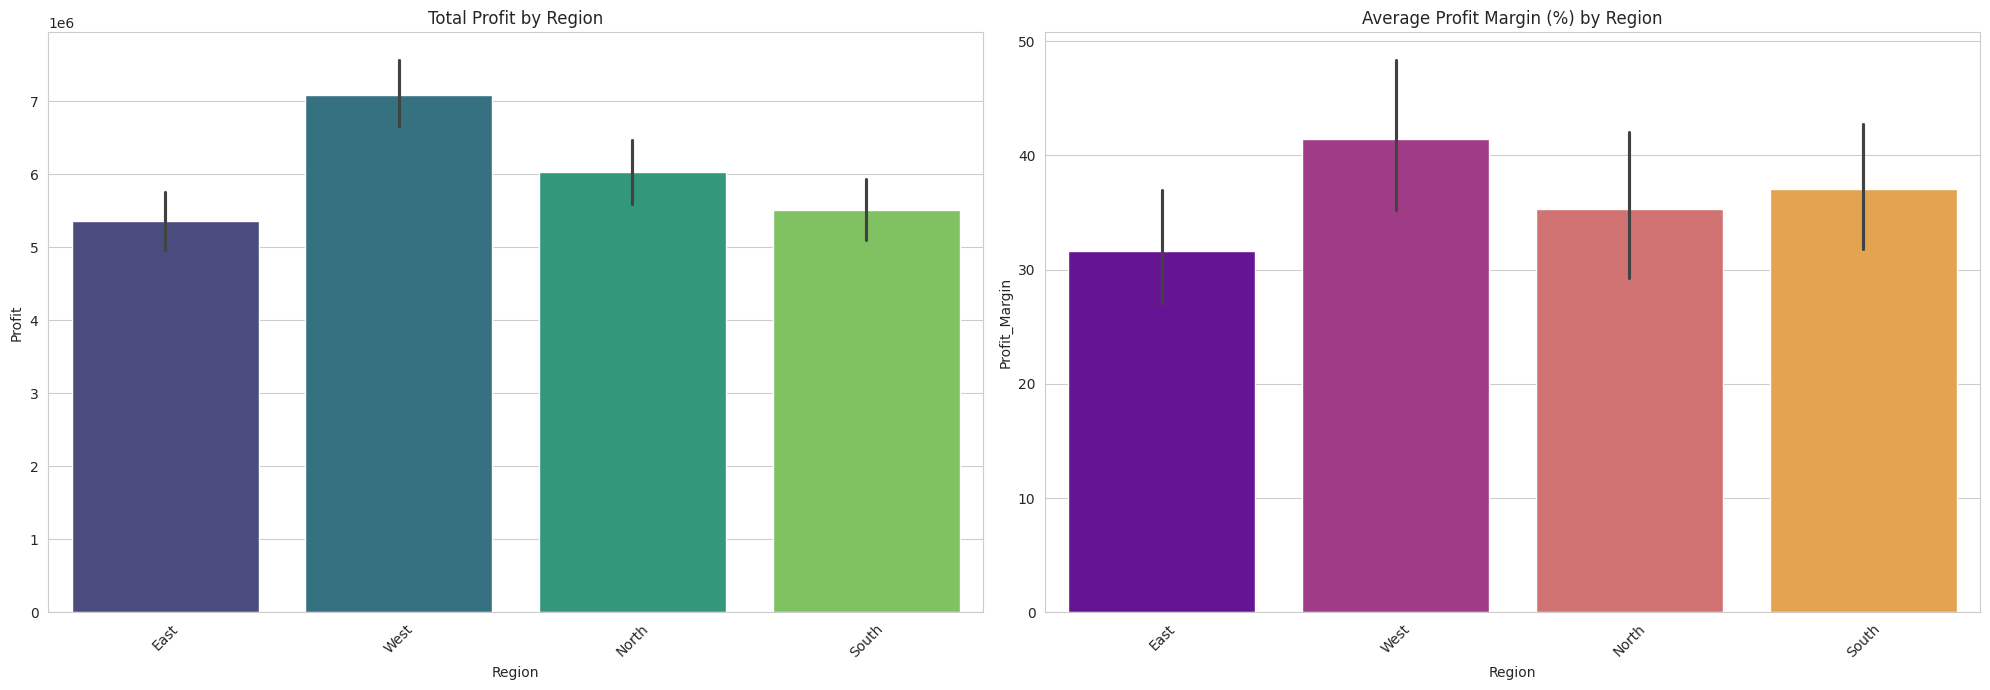

In [20]:
if 'df' in locals():
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))

    # Plot 1: Total Profit by Region
    # PERBAIKAN: Menambahkan hue='Region' dan legend=False
    sns.barplot(
        data=df,
        x='Region',
        y='Profit',
        estimator=sum,
        ax=ax[0],
        palette='viridis',
        hue='Region',  # <-- Tambahkan ini
        legend=False   # <-- Tambahkan ini
    )
    ax[0].set_title('Total Profit by Region')
    ax[0].tick_params(axis='x', rotation=45)

    # Plot 2: Average Profit Margin by Region
    # PERBAIKAN: Menambahkan hue='Region' dan legend=False
    sns.barplot(
        data=df,
        x='Region',
        y='Profit_Margin',
        estimator='mean',
        ax=ax[1],
        palette='plasma',
        hue='Region',  # <-- Tambahkan ini
        legend=False   # <-- Tambahkan ini
    )
    ax[1].set_title('Average Profit Margin (%) by Region')
    ax[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

Hasil Analisis Awal (Region)
*   **Total Profit:** Region West mencetak profit tertinggi, jauh di atas region lain. East justru paling rendah.
*   **Average Profit Margin:** Region West juga paling efisien dengan margin rata-rata di atas 40%. East lagi-lagi terendah (sekitar 31–32%), sedangkan North dan South berada di tengah.
*   **Insight Awal:**
Kinerja tiap region sangat berbeda. West unggul di profit dan efisiensi, sementara East paling lemah. Perlu analisis lebih lanjut untuk meningkatkan performa East, North, dan South dengan meniru strategi sukses dari West.



**Rumusan 2: Apakah diskon tinggi efektif? (Analisis Diskon vs. Profit)**

Kita gunakan scatter plot untuk melihat hubungan antara diskon dan profit di setiap transaksi.

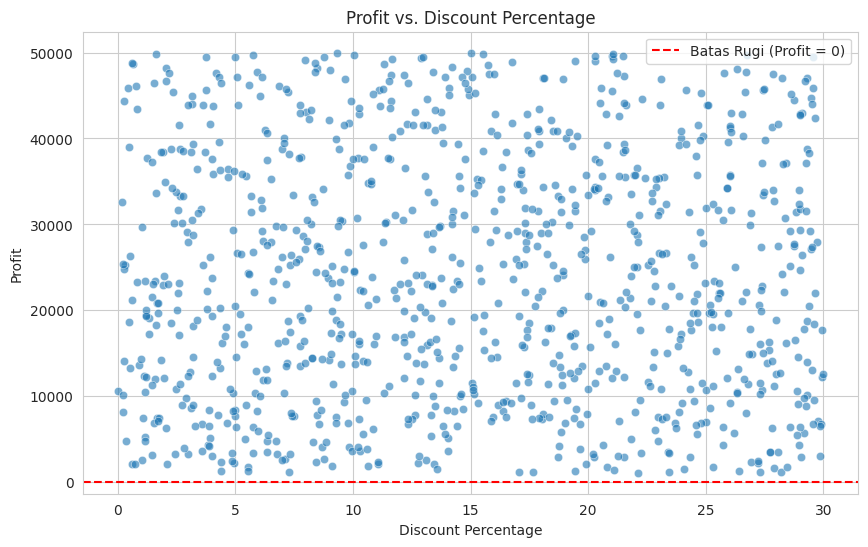

In [21]:
if 'df' in locals():
    plt.figure(figsize=(10, 6))

    # PERBAIKAN: Mengganti x='Discount' menjadi x='Discount_Percentage'
    sns.scatterplot(data=df, x='Discount_Percentage', y='Profit', alpha=0.6)

    # Tambahkan garis horizontal di y=0 untuk menandai batas rugi
    plt.axhline(0, color='red', linestyle='--', label='Batas Rugi (Profit = 0)')

    plt.title('Profit vs. Discount Percentage')

    # PERBAIKAN: Menyesuaikan label X agar sesuai
    plt.xlabel('Discount Percentage')
    plt.ylabel('Profit')
    plt.legend()
    plt.show()

Hasil Analisis Awal (Discount)
*   Scatter plot menunjukkan hubungan antara **persentase diskon** dan **profit**. Tidak tampak pola linear yang jelas; titik-titik data tersebar merata di berbagai tingkat profit.
*   Semua transaksi tetap **menghasilkan profit positif**, tidak ada kerugian, karena semua titik berada di atas garis merah (Profit = 0).
*   Namun, terlihat bahwa profit sangat tinggi (misalnya >40.000) jarang terjadi saat diskon besar (>20–25%).
*   **Insight Awal:**
Diskon tinggi tidak langsung menyebabkan rugi, tapi bisa menekan rata-rata profit per transaksi. Perlu analisis lanjut untuk melihat seberapa besar pengaruh diskon terhadap profit dan apakah peningkatan volume penjualan benar-benar menutupi penurunan margin.


**Rumusan 3: Kategori produk apa yang harus didorong?**

Kita akan membandingkan Kategori Produk berdasarkan Total Penjualan vs Total Profit.

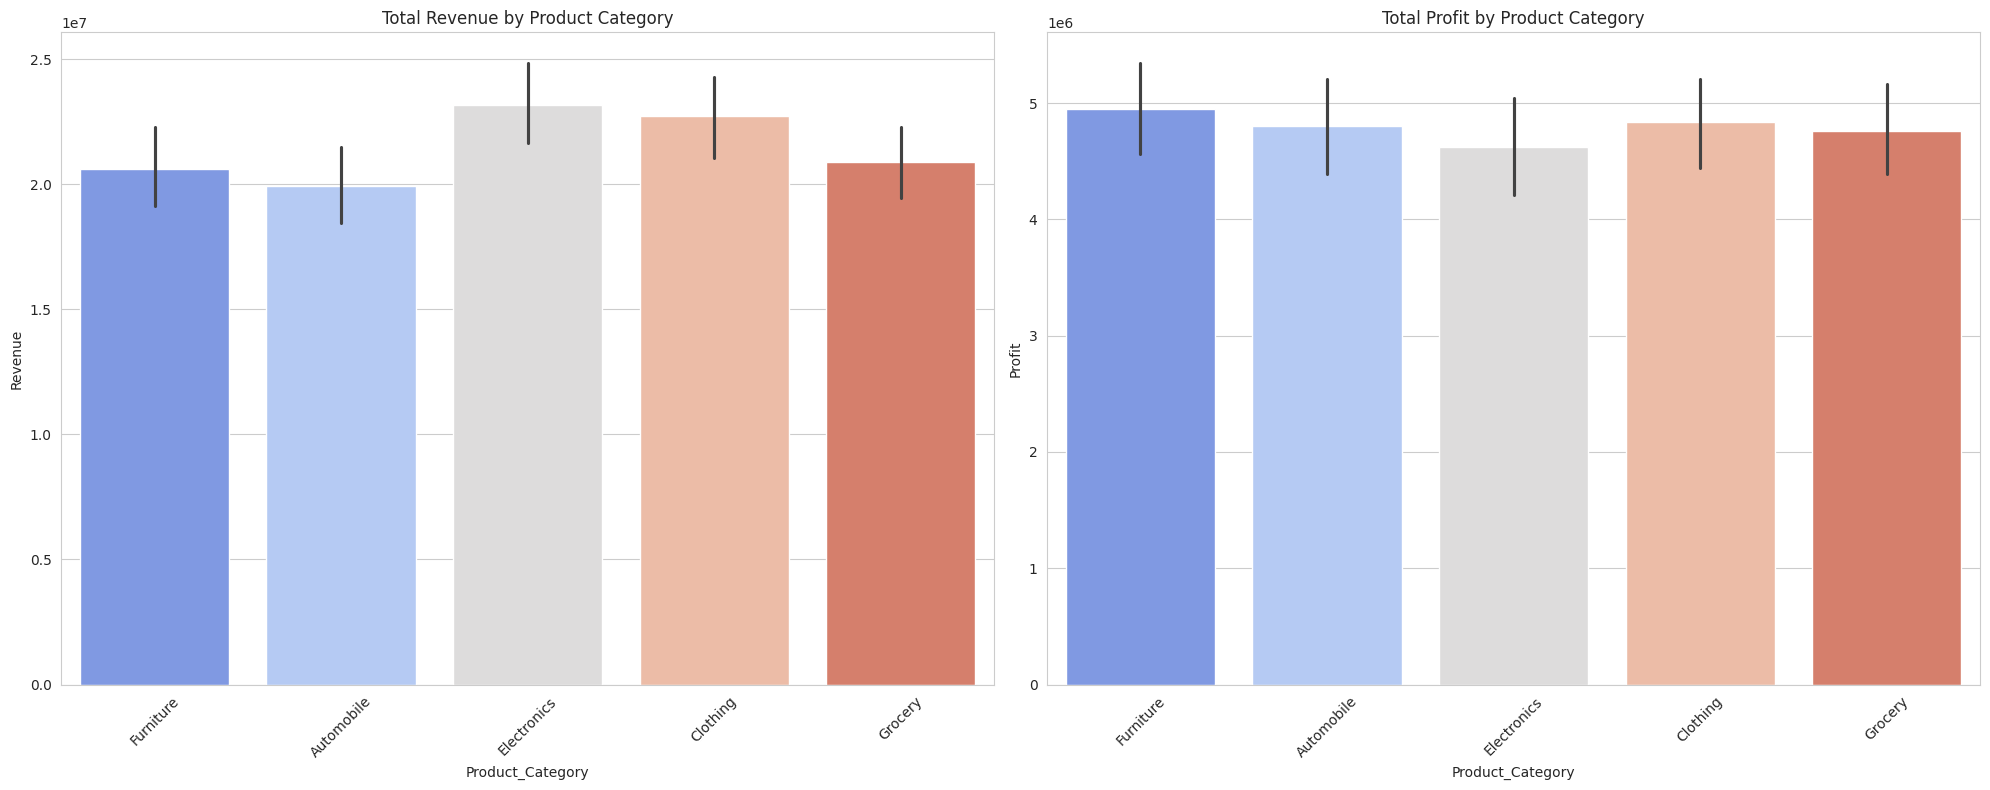

In [22]:
if 'df' in locals():
    fig, ax = plt.subplots(1, 2, figsize=(20, 8))

    # Plot 1: Total Revenue by Category
    # PERBAIKAN: Mengganti 'Product Category' -> 'Product_Category'
    # PERBAIKAN: Mengganti 'Sales_Amount' -> 'Revenue'
    # PERBAIKAN: Menambahkan 'hue' dan 'legend'
    sns.barplot(
        data=df,
        x='Product_Category',
        y='Revenue',
        estimator='sum',
        ax=ax[0],
        palette='coolwarm',
        hue='Product_Category', # <-- Tambahkan ini
        legend=False            # <-- Tambahkan ini
    )
    ax[0].set_title('Total Revenue by Product Category')
    ax[0].tick_params(axis='x', rotation=45)

    # Plot 2: Total Profit by Category
    # PERBAIKAN: Mengganti 'Product Category' -> 'Product_Category'
    # PERBAIKAN: Menambahkan 'hue' dan 'legend'
    sns.barplot(
        data=df,
        x='Product_Category',
        y='Profit',
        estimator='sum',
        ax=ax[1],
        palette='coolwarm',
        hue='Product_Category', # <-- Tambahkan ini
        legend=False            # <-- Tambahkan ini
    )
    ax[1].set_title('Total Profit by Product Category')
    ax[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

Hasil Analisis Awal (Product Category)
*   **Revenue:** Kategori Electronics dan Clothing jadi penyumbang pendapatan terbesar, sedangkan Automobile paling rendah.
*   **Profit:** Dari sisi laba, Furniture dan Clothing mendominasi. Menariknya, Electronics yang punya revenue tinggi justru menghasilkan profit paling kecil.
*   **Paradoks Profit:** Electronics punya penjualan besar tapi margin tipis, sementara Furniture justru punya margin tinggi meski revenue-nya sedang. Clothing tampil stabil di keduanya.
*   **Insight Awal:** Strategi penjualan perlu dievaluasi. Fokus berlebihan pada Electronics meningkatkan pendapatan tapi tidak banyak menambah laba. Perusahaan sebaiknya lebih menitikberatkan pada kategori Furniture dan Clothing yang memberi margin lebih tinggi.



## 3. Insight & Findings

Tiga Wawasan Utama dari EDA:

1.   **Diskon Belum Berdampak Besar pada Profit, Tapi Tetap Perlu Diawasi**
*   Tidak ada hubungan kuat antara persentase diskon dan profit yang menyebabkan kerugian, semua transaksi tetap untung.
*   Namun, profit tinggi jarang muncul saat diskon besar (>20–25%). Artinya, diskon tinggi bisa menekan potensi laba maksimal. Kebijakan diskon perlu dievaluasi agar tetap menarik bagi pelanggan tanpa mengorbankan profit.

2.   **Region West Jadi Pusat Keuntungan dan Efisiensi Tertinggi**
*   Region West mencetak Total Profit dan Average Profit Margin tertinggi, menunjukkan strategi dan operasional yang efektif.
*   Region East sebaliknya, punya profit dan margin terendah, sehingga perlu perhatian lebih.
*   North dan South masih berada di tengah, ada peluang untuk meningkatkan efisiensi dengan meniru praktik terbaik dari West.

3.   **Revenue Tidak Selalu Berarti Profit: Kasus Electronics**
*   Electronics memiliki Revenue tertinggi tapi Profit terendah, menandakan margin tipis dan efektivitas rendah.
*   Furniture dan Clothing justru memberikan Profit besar meski revenue-nya tidak sebesar Electronics.
*   Fokus sumber daya sebaiknya diarahkan ke kategori dengan margin tinggi seperti Furniture dan Clothing untuk mendorong pertumbuhan laba yang lebih berkelanjutan.









## 4. AI Support Explanation


A. Tujuan Penggunaan AI:
Dalam proyek ini, AI (Large Language Model) tidak digunakan untuk menganalisis data langsung, tetapi berperan sebagai alat bantu pengambilan keputusan. Tujuannya adalah membantu menyusun dan merangkum hasil analisis menjadi draf rekomendasi bisnis awal yang lebih terarah.

B. Cara Penggunaan AI:
AI generatif (seperti fitur AI di Google Colab) digunakan untuk dua hal utama berdasarkan hasil EDA:
*   Peringkasan (Summarization): Meminta AI untuk merangkum 3 insight utama ke dalam format laporan singkat yang menonjolkan dampak bisnisnya.
*   Pembuatan Rekomendasi (Recommendation Generation): Meminta AI menghasilkan ide awal rekomendasi bisnis yang dapat ditindaklanjuti sesuai dengan insight yang ditemukan.

C. Alasan Penggunaan AI:
AI membantu mempercepat proses dari temuan data menjadi ide strategis. Hasil dari AI kemudian ditinjau dan disesuaikan secara manual agar tetap relevan dengan konteks bisnis dan memenuhi standar penilaian pada bagian Conclusion & Recommendation.

**Contoh Prompt yang Digunakan:**


```text
"Sebagai seorang analis data, saya telah menemukan 3 insight utama dari analisis data kinerja penjualan global:

Temuan:
1.  Pemberian diskon tinggi (di atas ~20-25%) tidak menyebabkan kerugian langsung, tetapi tampaknya membatasi potensi profit maksimal per transaksi.
2.  Region 'West' menunjukkan kinerja terbaik, unggul dalam Total Profit dan Average Profit Margin. Sebaliknya, Region 'East' memiliki performa terendah di kedua metrik.
3.  Kategori produk 'Electronics' menghasilkan Revenue tertinggi namun Profit terendah (margin sangat tipis), sedangkan 'Furniture' dan 'Clothing' adalah kontributor Profit terbesar."

Berdasarkan ketiga temuan ini, tolong berikan 3 draf rekomendasi bisnis yang konkret, actionable, dan memiliki dampak nyata untuk meningkatkan profitabilitas perusahaan secara keseluruhan."
```

Output dari prompt ini kemudian menjadi dasar yang disempurnakan untuk bagian Rekomendasi final.

## 5. Conclusion & Recommendation

KESIMPULAN

Analisis Global Sales Performance menunjukkan bahwa profit perusahaan tidak selalu sejalan dengan besarnya revenue. Beberapa faktor utama yang memengaruhi profitabilitas antara lain:
*   **Diskon dapat membatasi profit:** Walau diskon tinggi (>20–25%) tidak menyebabkan kerugian, terdapat indikasi bahwa diskon besar menurunkan potensi profit maksimal per transaksi.
*   **Region West unggul paling tinggi:** Region ini menunjukkan performa terbaik dari segi total profit dan efisiensi margin, menandakan strategi dan operasional yang efektif.
*   **Kesenjangan antar wilayah:** Region East memiliki profit dan margin paling rendah, sehingga perlu menjadi fokus perbaikan utama.
*   **Paradoks pada kategori produk:** Electronics menghasilkan revenue tertinggi tapi profit terendah (margin tipis), sedangkan Furniture dan Clothing justru memberi kontribusi profit terbesar.

Secara keseluruhan, strategi peningkatan profitabilitas dapat dicapai dengan:
- Meninjau ulang kebijakan diskon agar tetap kompetitif tanpa mengorbankan margin,
- Meniru praktik sukses dari Region West di wilayah lain, khususnya East,
- Memfokuskan sumber daya pada kategori Furniture dan Clothing yang terbukti lebih menguntungkan.
---------------------------------------------------------

REKOMENDASI

1. **Tinjau Ulang Kebijakan Diskon untuk Memaksimalkan Profit (Target: Batasi Diskon Reguler < 20%)**
- Rekomendasi: Batasi diskon reguler maksimal 15%; diskon 16–20% butuh persetujuan manajer; hindari >20% kecuali ada alasan bisnis kuat.
- Dampak: Profit per transaksi naik karena diskon berlebihan berkurang.
2. **Fokus ke Furniture & Clothing**
- Rekomendasi: Alihkan anggaran pemasaran dari Electronics ke Furniture/Clothing; beri insentif & pelatihan sales untuk produk bermargin tinggi.
- Dampak: Penjualan bergeser ke produk lebih menguntungkan, profit total meningkat.
3. **Perbaikan Regional (East vs West)**
- Rekomendasi: Audit Region East dan adopsi praktik sukses dari West terkait biaya, strategi produk, dan efisiensi tim.
- Dampak: Meningkatkan kinerja dan profit di wilayah berkinerja rendah, terutama East.